In [67]:
from pathlib import Path 

PATH_DATASETS=Path("/data/bacteria/gold-standard-datasets/")   # GEBA | FDA-ARGOS | NCTC3000
PATH_TOOLS_EVALUATION=Path("/data/bacteria/tools-evaluation/") # gambit | panspace

name_dataset= "GEBA"

In [68]:
ids_fa = [p.stem for p in PATH_DATASETS.joinpath(f"{name_dataset}").rglob("*fna")]
len(ids_fa)

396

## Ground truth

In [69]:
## Find ground truth 
from Bio import SeqIO
from collections import namedtuple 

# for path in  Path("/data/bacteria/ena-nctc3000").rglob("*fa"):
paths = list( PATH_DATASETS.joinpath(f"{name_dataset}").rglob("*fna"))#[0].stem

# FASTA=Path("/data/bacteria/ena-nctc3000/")

Labels=namedtuple("Labels",["sampleid","ground_truth","path_fasta"])
labels = []
for path_fa in paths:

    # path_fa = FASTA.joinpath(f"{ID}.fa")
    print(path_fa)
    with open(path_fa, "r") as fp:
        records = []
        for record in SeqIO.parse(fp, format="fasta"):
            records.append(record)
        gt = "_".join(records[0].description.lower().split(" ")[1:3])
    sampleid = path_fa.stem
    labels.append(Labels(sampleid, gt, path_fa))    

/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCF_000212375.1/GCF_000212375.1_ASM21237v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000966265.1/GCA_000966265.1_ASM96626v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000023945.1/GCA_000023945.1_ASM2394v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCF_000186365.1/GCF_000186365.1_ASM18636v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000317835.1/GCA_000317835.1_ASM31783v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCF_000184345.1/GCF_000184345.1_ASM18434v2_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000023285.1/GCA_000023285.1_ASM2328v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000186385.1/GCA_000186385.1_ASM18638v1_genomic.fna
/data/bacteria/gold-standard-datasets/GEBA/ncbi_dataset/data/GCA_000024985

In [70]:
import pandas as pd
gt_dataset = pd.DataFrame(labels)
gt_dataset.to_csv(PATH_DATASETS.joinpath(f"labels-{name_dataset}.csv"),sep="\t")

___
Comparison other tools


### GAMBIT
second column correspond to the predicted name, third column to the taxonomy rank, could be species, or genus level, it can also by empty and in that case the predicted name is empty as well. 

In [71]:
df_gambit = pd.read_csv(PATH_TOOLS_EVALUATION.joinpath(f"gambit/output-gambit-{name_dataset}.csv"))
df_gambit.head(2)

,query,predicted.name,predicted.rank,predicted.ncbi_id,predicted.threshold,closest.distance,closest.description,next.name,next.rank,next.ncbi_id,next.threshold
0,GCA_000023105.1_ASM2310v1_genomic,NaN,NaN,NaN,NaN,0.972009,[GCF_000971455.1] Demequina rhizosphaerae (hig...,Demequina,genus,577469.0,0.797268
1,GCA_000023125.1_ASM2312v1_genomic,NaN,NaN,NaN,NaN,0.994567,[GCF_000632475.1] Azospirillum brasilense (a-p...,Azospirillum,genus,191.0,0.925654


In [72]:
import json
import pandas as pd

from pathlib import Path
from collections import Counter, namedtuple, defaultdict

from sklearn.metrics import (
    precision_score, 
    recall_score,
    accuracy_score, 
    balanced_accuracy_score
    )



In [73]:
# ground truth
df_gt = gt_dataset

In [74]:
df_merge = pd.merge(df_gambit,df_gt, left_on="query", right_on="sampleid")
df_merge["predicted"] = df_merge["predicted.name"].apply(lambda x: "_".join(str(x).lower().split(" ")))
df_merge.head(2)


,query,predicted.name,predicted.rank,predicted.ncbi_id,predicted.threshold,closest.distance,closest.description,next.name,next.rank,next.ncbi_id,next.threshold,sampleid,ground_truth,path_fasta,predicted
0,GCA_000023105.1_ASM2310v1_genomic,NaN,NaN,NaN,NaN,0.972009,[GCF_000971455.1] Demequina rhizosphaerae (hig...,Demequina,genus,577469.0,0.797268,GCA_000023105.1_ASM2310v1_genomic,beutenbergia_cavernae,/data/bacteria/gold-standard-datasets/GEBA/ncb...,nan
1,GCA_000023125.1_ASM2312v1_genomic,NaN,NaN,NaN,NaN,0.994567,[GCF_000632475.1] Azospirillum brasilense (a-p...,Azospirillum,genus,191.0,0.925654,GCA_000023125.1_ASM2312v1_genomic,dyadobacter_fermentans,/data/bacteria/gold-standard-datasets/GEBA/ncb...,nan


In [75]:
classes = df_merge.ground_truth.unique()
classes = sorted(classes)
y_true, y_pred = df_merge.ground_truth, df_merge.predicted
y_true, 
y_pred

0                   nan
1                   nan
2                   nan
3                   nan
4                   nan
             ...       
391                 nan
392                 nan
393    escherichia_coli
394                 nan
395                 nan
Name: predicted, Length: 396, dtype: object

In [76]:
accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred), len(classes)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


(0.11868686868686869, 0.11594202898550725, 207)

___

### PANSPACE


In [77]:
df_panspace = pd.read_csv(PATH_TOOLS_EVALUATION.joinpath(f"panspace/{name_dataset}/query.csv"), sep="\t")
df_panspace
# /data/bacteria/tools-evaluation/panspace/NCTC3000/query.csv

,Unnamed: 0.1,path_fasta,Unnamed: 0,sample_id_query,sample_id_0,label_0,distance_to_0,sample_id_1,label_1,distance_to_1,...,distance_to_6,sample_id_7,label_7,distance_to_7,sample_id_8,label_8,distance_to_8,sample_id_9,label_9,distance_to_9
0,0,/data/bacteria/gold-standard-datasets/GEBA/ncb...,0,GCA_000585375.1_ASM58537v1_genomic,SAMN05443668,dermabacter_vaginalis,0.004917,SAMN05443637,pseudonocardia_dioxanivorans,0.008039,...,0.011491,SAMN02199060,pseudonocardia_dioxanivorans,0.011559,SAMN05421684,micromonospora_aurantiaca,0.012348,SAMN05722966,pseudonocardia_sp._hh130630-07,0.012488
1,1,/data/bacteria/gold-standard-datasets/GEBA/ncb...,1,GCF_000166095.1_ASM16609v1_genomic,SAMN08886077,halobacillus_halophilus,0.036464,SAMN02745069,brevundimonas_diminuta,0.036589,...,0.039954,SAMN08886087,candidatus_pelagibacter_sp._rs40,0.040400,SAMN02441297,staphylococcus_capitis,0.040704,SAMN08886286,halobacillus_halophilus,0.041188
2,2,/data/bacteria/gold-standard-datasets/GEBA/ncb...,2,GCF_000213255.1_ASM21325v1_genomic,SAMN05444406,thermoclostridium_stercorarium,0.094157,SAMN07501347,campylobacter_iguaniorum,0.099673,...,0.113297,SAMN00691397,flavisolibacter_tropicus,0.113693,SAMN04461275,faecalibacterium_prausnitzii,0.116811,SAMN02199071,pelosinus_fermentans,0.117238
3,3,/data/bacteria/gold-standard-datasets/GEBA/ncb...,3,GCF_000165715.2_ASM16571v3_genomic,SAMN00189992,rubinisphaera_brasiliensis,0.000686,SAMN00103628,rubinisphaera_brasiliensis,0.000991,...,0.083879,SAMN04487869,marinobacter_sp._cp1,0.087594,SAMN02442007,bifidobacterium_catenulatum,0.088031,SAMN02442033,bifidobacterium_kashiwanohense,0.089903
4,4,/data/bacteria/gold-standard-datasets/GEBA/ncb...,4,GCF_000373545.1_ASM37354v1_genomic,SAMN00808738,spirochaeta_africana,0.000455,SAMN02440429,spirochaeta_africana,0.001837,...,0.114798,SAMEA1710577,flavonifractor_plautii,0.115832,SAMEA1710505,flavonifractor_plautii,0.116009,SAMN03890861,geobacter_sulfurreducens,0.116260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,/data/bacteria/gold-standard-datasets/GEBA/ncb...,391,GCA_000517565.1_ASM51756v1_genomic,SAMN05660835,desulfurella_acetivorans,0.004801,SAMN05290024,borreliella_burgdorferi,0.081141,...,0.102189,SAMN07125805,campylobacter_ureolyticus,0.103337,SAMN05289995,borreliella_burgdorferi,0.103649,SAMN06314765,sulfurimonas_gotlandica,0.104166
392,392,/data/bacteria/gold-standard-datasets/GEBA/ncb...,392,GCF_000144695.1_ASM14469v1_genomic,SAMN08777877,halanaerobium_praevalens,0.096353,SAMN02198996,gramella_sp._mar_2010_102,0.103776,...,0.118214,SAMN06229908,alkaliphilus_metalliredigens,0.119996,SAMN02745094,escherichia_coli,0.124102,SAMEA3545416,clostridium_chauvoei,0.126072
393,393,/data/bacteria/gold-standard-datasets/GEBA/ncb...,393,GCF_000212375.1_ASM21237v1_genomic,SAMN02440769,porphyromonas_asaccharolytica,0.006520,SAMN00792234,porphyromonas_gingivalis,0.107582,...,0.146408,SAMN02923970,proteus_mirabilis,0.158252,SAMN02923763,candidatus_saccharibacteria_oral_taxon_tm7x,0.159210,SAMN02923769,candidatus_saccharibacteria_oral_taxon_tm7x,0.160001
394,394,/data/bacteria/gold-standard-datasets/GEBA/ncb...,394,GCA_000194605.1_ASM19460v1_genomic,SAMN00016632,fluviicola_taffensis,0.000377,SAMN00713599,fluviicola_taffensis,0.000559,...,0.075637,SAMN03458292,listeria_monocytogenes,0.075736,SAMN02441252,flavobacterium_johnsoniae,0.078033,SAMN05443253,bacillus_sp._x1(2014),0.078954


In [78]:
df_merge = pd.merge(df_panspace,df_gt, left_on="sample_id_query", right_on="sampleid")
cols_labels = [c for c in df_panspace.columns if c.startswith("label")]
df_merge["predicted"] = df_merge[cols_labels].apply(lambda row: Counter(row).most_common(1)[0][0],axis=1)
# df_merge["predicted"] = df_merge["label_0"]#.apply(lambda x: "_".join(str(x).lower().split(" ")))
df_merge.head(2)

,Unnamed: 0.1,path_fasta_x,Unnamed: 0,sample_id_query,sample_id_0,label_0,distance_to_0,sample_id_1,label_1,distance_to_1,...,sample_id_8,label_8,distance_to_8,sample_id_9,label_9,distance_to_9,sampleid,ground_truth,path_fasta_y,predicted
0,0,/data/bacteria/gold-standard-datasets/GEBA/ncb...,0,GCA_000585375.1_ASM58537v1_genomic,SAMN05443668,dermabacter_vaginalis,0.004917,SAMN05443637,pseudonocardia_dioxanivorans,0.008039,...,SAMN05421684,micromonospora_aurantiaca,0.012348,SAMN05722966,pseudonocardia_sp._hh130630-07,0.012488,GCA_000585375.1_ASM58537v1_genomic,cryptosporangium_arvum,/data/bacteria/gold-standard-datasets/GEBA/ncb...,amycolatopsis_mediterranei
1,1,/data/bacteria/gold-standard-datasets/GEBA/ncb...,1,GCF_000166095.1_ASM16609v1_genomic,SAMN08886077,halobacillus_halophilus,0.036464,SAMN02745069,brevundimonas_diminuta,0.036589,...,SAMN02441297,staphylococcus_capitis,0.040704,SAMN08886286,halobacillus_halophilus,0.041188,GCF_000166095.1_ASM16609v1_genomic,methanothermus_fervidus,/data/bacteria/gold-standard-datasets/GEBA/ncb...,halobacillus_halophilus


In [79]:
classes = df_merge.ground_truth.unique()
classes = sorted(classes)
y_true, y_pred = df_merge.ground_truth, df_merge.predicted
y_true, 
y_pred

0          amycolatopsis_mediterranei
1             halobacillus_halophilus
2      thermoclostridium_stercorarium
3                  labrenzia_sp._vg12
4                spirochaeta_africana
                    ...              
391           borreliella_burgdorferi
392          halanaerobium_praevalens
393          porphyromonas_gingivalis
394              fluviicola_taffensis
395         geodermatophilus_obscurus
Name: predicted, Length: 396, dtype: object

In [80]:
accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred), len(classes)

/home/avila/micromamba/envs/train/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


(0.16666666666666666, 0.1642512077294686, 207)

In [81]:
from src.panspace.utils import LogInfo
info = []
loginfo = LogInfo()
# /data/bacteria/ena-nctc3000-panspace-mse/logs
for log in Path("/data/bacteria/tools-evaluation/panspace/NCTC3000/logs").rglob("*log"):
    log_dict=loginfo(log)
    log_dict["task"] = log.stem.split("-")[0]
    info.append(
        log_dict
    )


In [82]:
log.stem.split("-")[0] 

'fcgr'

In [51]:
pd.DataFrame(info).groupby("task")[["User time (seconds)", "Maximum resident set size (kbytes)"]].describe()

User time (seconds)                                     \
                               count       mean       std    min    25%   
task                                                                      
count_kmers_dump              4397.0   0.014726  0.006990   0.00   0.01   
count_kmers_kmc               4397.0   0.023768  0.009078   0.00   0.02   
fcgr                          4397.0   0.420992  0.060623   0.27   0.38   
query_index                      1.0  15.710000       NaN  15.71  15.71   

                                      Maximum resident set size (kbytes)  \
                    50%    75%    max                              count   
task                                                                       
count_kmers_dump   0.01   0.02   0.03                             4397.0   
count_kmers_kmc    0.02   0.03   0.06                             4397.0   
fcgr               0.42   0.47   0.58                             4397.0   
query_index       15.71  15.71  15.71                                1.0   

                                                                              \
                          mean          std        min        25%        50%   
task                                                                           
count_kmers_dump  2.458051e+04    79.447155    24192.0    24576.0    24576.0   
count_kmers_kmc   3.313963e+04  3835.549217    24064.0    29824.0    33024.0   
fcgr              6.752636e+04   144.817055    66240.0    67496.0    67524.0   
query_index       1.304428e+06          NaN  1304428.0  1304428.0  1304428.0   

                                        
                        75%        max  
task                                    
count_kmers_dump    24576.0    24832.0  
count_kmers_kmc     35584.0    47488.0  
fcgr                67648.0    67784.0  
query_index       1304428.0  1304428.0

In [115]:
df_gambit["predicted.name"].isna().sum()

299

In [75]:
(df_gambit["predicted.rank"] == "species").sum()

1381

In [ ]:
y_pred = df_gambit["predicted.name"]
y_true = df_gambit["ground_truth"] 

In [29]:
ids_npy = [p.stem for p in Path("/data/bacteria/ena-output-panspace").rglob("*npy")]

In [30]:
len(ids_npy)

2248

In [18]:
set(ids_fa)-set(ids_npy)

set()

In [11]:
from Bio import SeqIO

FASTA=Path("/data/bacteria/ena-output/")
ID="GCA_001182745.2"

path_fa = FASTA.joinpath(f"{ID}.fa")
print(path_fa)
with open(path_fa, "r") as fp:
    records = []
    for record in SeqIO.parse(fp, format="fasta"):
        records.append(record)

/data/bacteria/ena-output/GCA_001182745.2.fa


In [13]:
for record in records:
    print(set(record.seq))

{'C', 'A', 'T', 'G'}
{'C', 'A', 'T', 'G'}
{'C', 'A', 'T', 'G'}
{'G', 'A', 'T', 'C'}
{'G', 'A', 'T', 'C'}


In [21]:
import numpy as np
from complexcgr import FCGR
fcgr = FCGR(6)

pe = {p.stem: p for p in Path("/data/bacteria/ena-output-panspace/fcgr").rglob("*npy")}


/home/avila/micromamba/envs/train/lib/python3.11/site-packages/complexcgr/fcgr.py:85: RuntimeWarning: invalid value encountered in divide
  img_rescaled = (array - m) / (M-m)
/home/avila/micromamba/envs/train/lib/python3.11/site-packages/complexcgr/fcgr.py:90: RuntimeWarning: invalid value encountered in cast
  img_array = np.array(img_array, dtype=dtype)


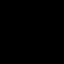

In [23]:
id_ = "GCA_900447785.1"
fcgr.plot(np.load(pe[id_]))

In [24]:
np.load(pe[id_])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])